# Testing Regularization on MNIST with LeNet

## Imports and data loading

In [1]:
import torch
import jupyter_black
from torchsummary import summary

from data_generators import data_loader_MNIST
from model_classes import LeNet
from tools import plot_results, plot_reg_results, train

jupyter_black.load()

c:\Users\aslak\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Loading MNIST dataset
in_channels = 1
train_loader, test_loader = data_loader_MNIST()
summary_model = LeNet(lr=0.01, momentum=0.9, in_channels=in_channels).to(device)
summary(summary_model, (in_channels, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
           Dropout-6                  [-1, 120]               0
            Linear-7                   [-1, 84]          10,164
           Dropout-8                   [-1, 84]               0
            Linear-9                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
---------------------------------------------

## Hyperparameters

In [4]:
lr = 0.01
momentum = 0.9

## No regularization

In [5]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs
)

Epoch: 0
Accuracy of the network on the test images: 75 %
Epoch: 1
Accuracy of the network on the test images: 85 %
Epoch: 2
Accuracy of the network on the test images: 86 %


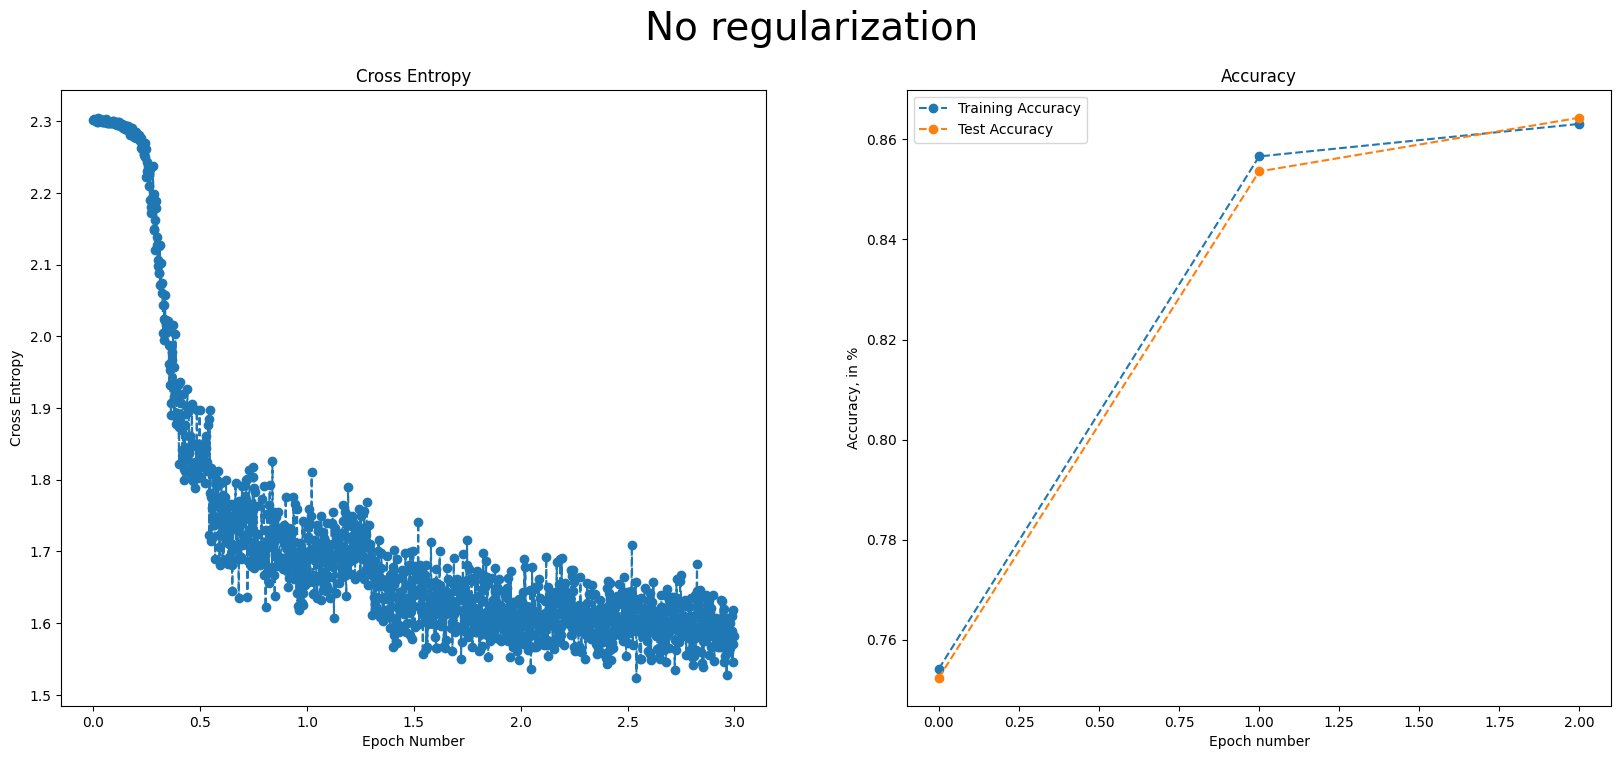

In [6]:
plot_results(
    epochs, losses, train_accuracies, test_accuracies, title="No regularization"
)

## L1 Regularization

In [7]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, l1=True, l1_lmbd=0.001
)

Epoch: 0
Accuracy of the network on the test images: 75 %
Epoch: 1
Accuracy of the network on the test images: 89 %
Epoch: 2
Accuracy of the network on the test images: 91 %


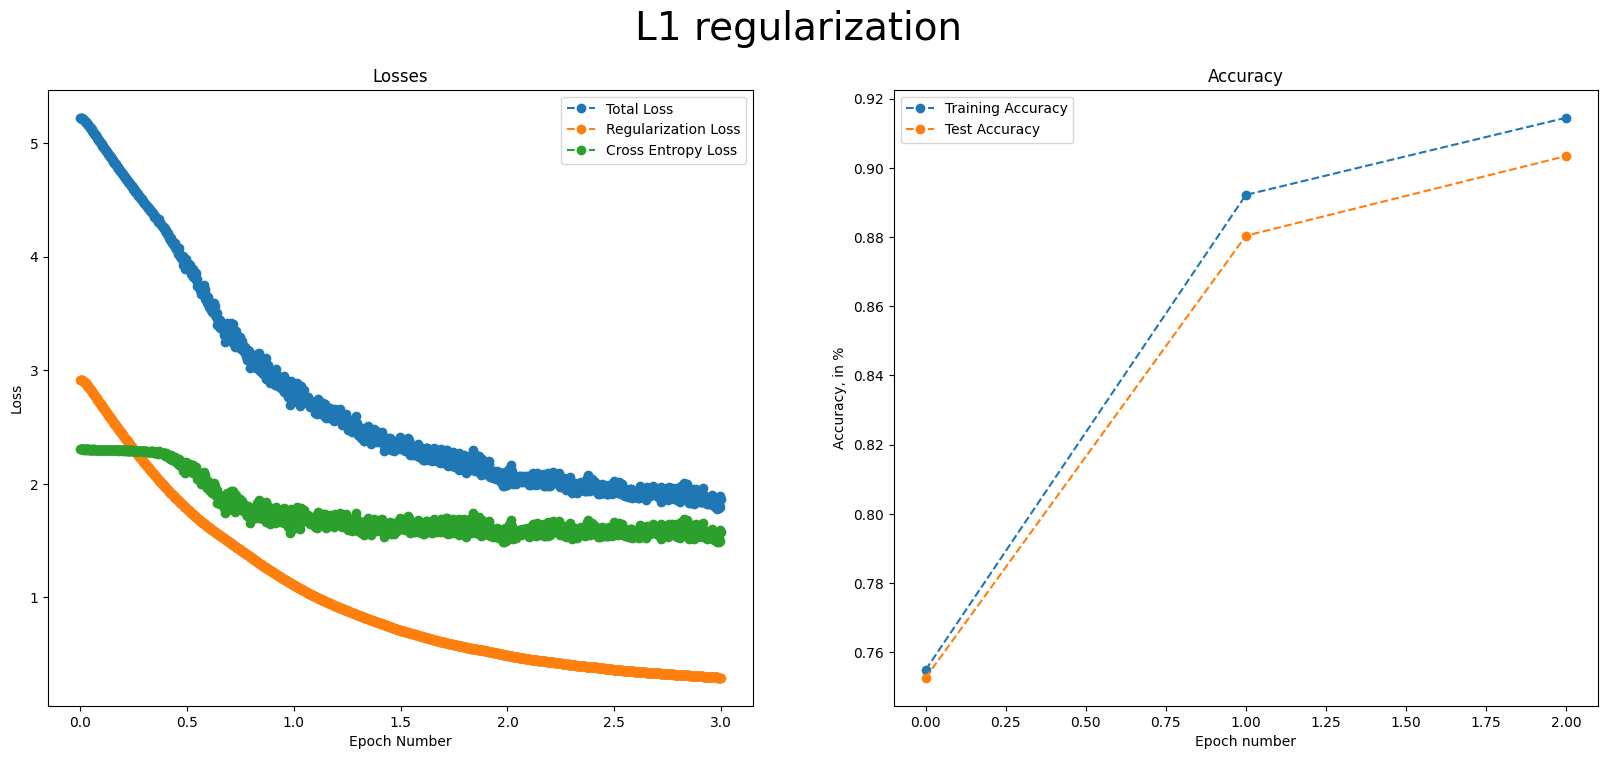

In [8]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="L1 regularization",
)

## L2 Regularization

In [9]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, l2=True, l2_lmbd=0.01
)

Epoch: 0
Accuracy of the network on the test images: 77 %
Epoch: 1
Accuracy of the network on the test images: 89 %
Epoch: 2
Accuracy of the network on the test images: 90 %


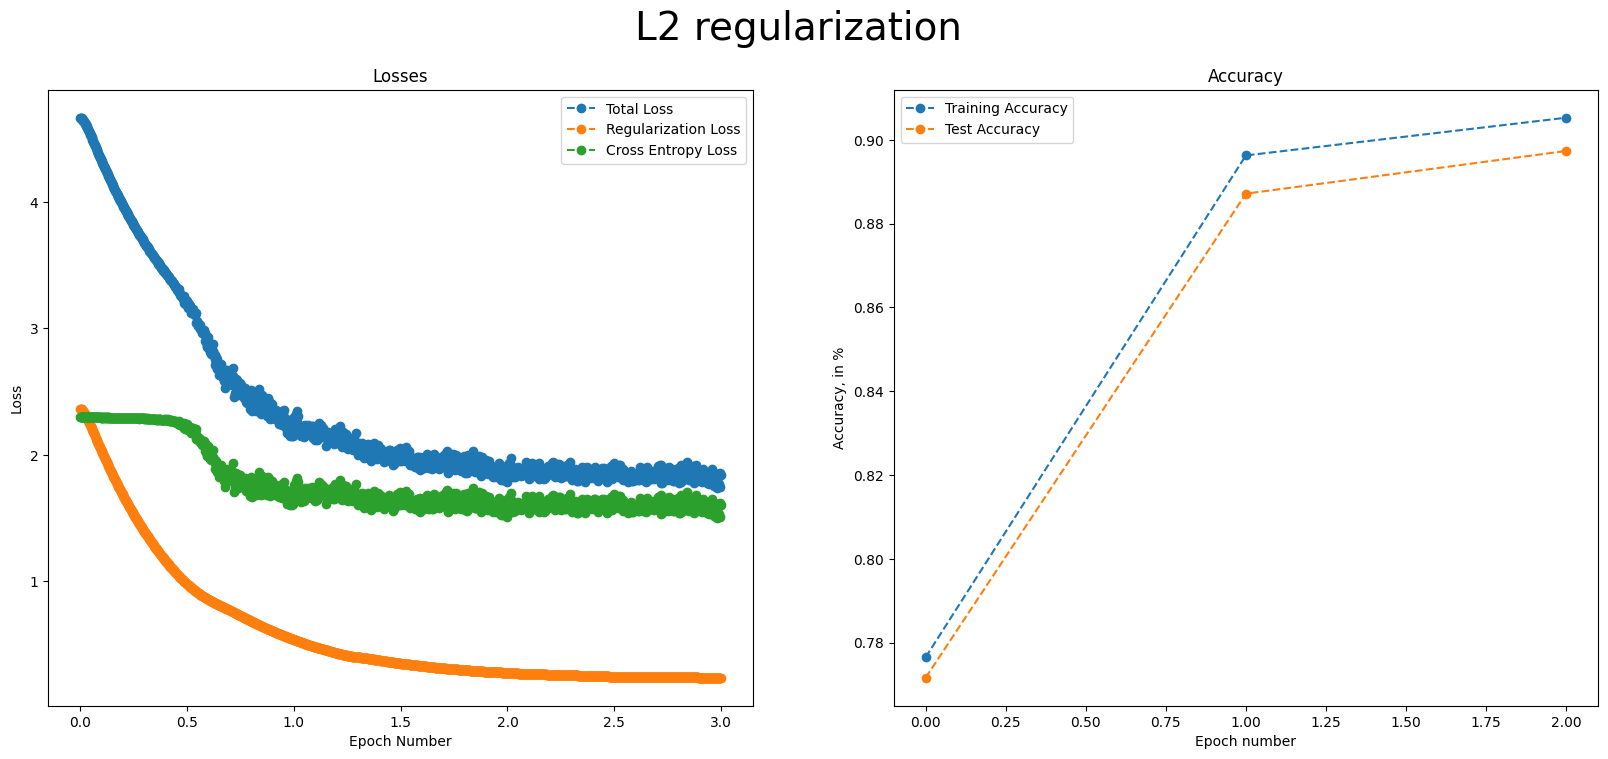

In [10]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="L2 regularization",
)

## Elastic Net Regularization (L1 and L2)

In [11]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader,
    test_loader,
    model,
    n_epochs,
    l1=True,
    l1_lmbd=0.001,
    l2=True,
    l2_lmbd=0.001,
)

Epoch: 0
Accuracy of the network on the test images: 71 %
Epoch: 1
Accuracy of the network on the test images: 75 %
Epoch: 2
Accuracy of the network on the test images: 81 %
Epoch: 3
Accuracy of the network on the test images: 82 %
Epoch: 4
Accuracy of the network on the test images: 82 %


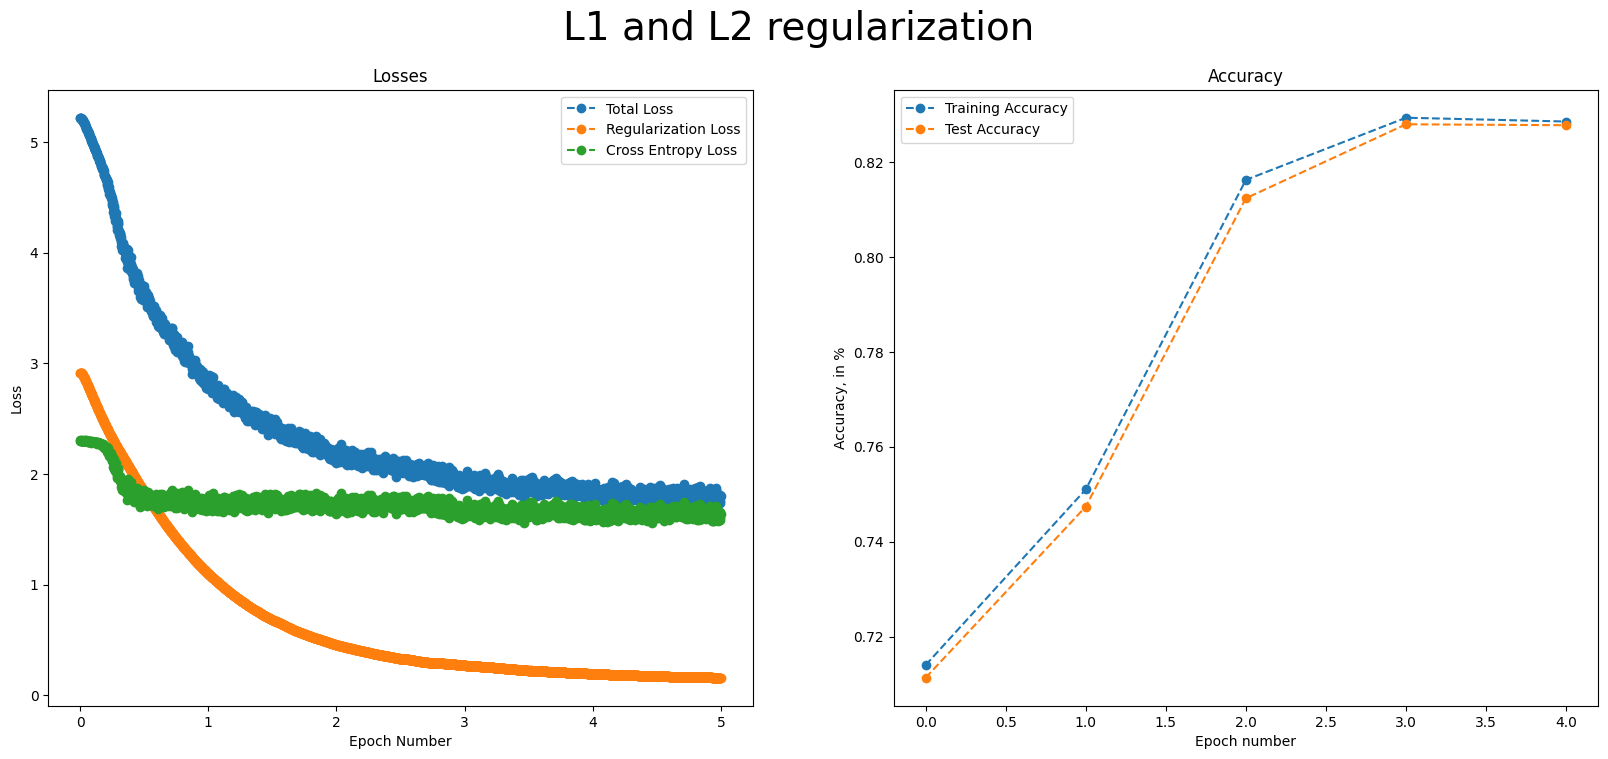

In [12]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="L1 and L2 regularization",
)

## Soft SVB Regularization

In [13]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, soft_svb=True, soft_svb_lmbd=0.01
)
print(len(epochs))

Epoch: 0
Accuracy of the network on the test images: 74 %
Epoch: 1
Accuracy of the network on the test images: 76 %
Epoch: 2
Accuracy of the network on the test images: 78 %
Epoch: 3
Accuracy of the network on the test images: 87 %
Epoch: 4
Accuracy of the network on the test images: 88 %
2345


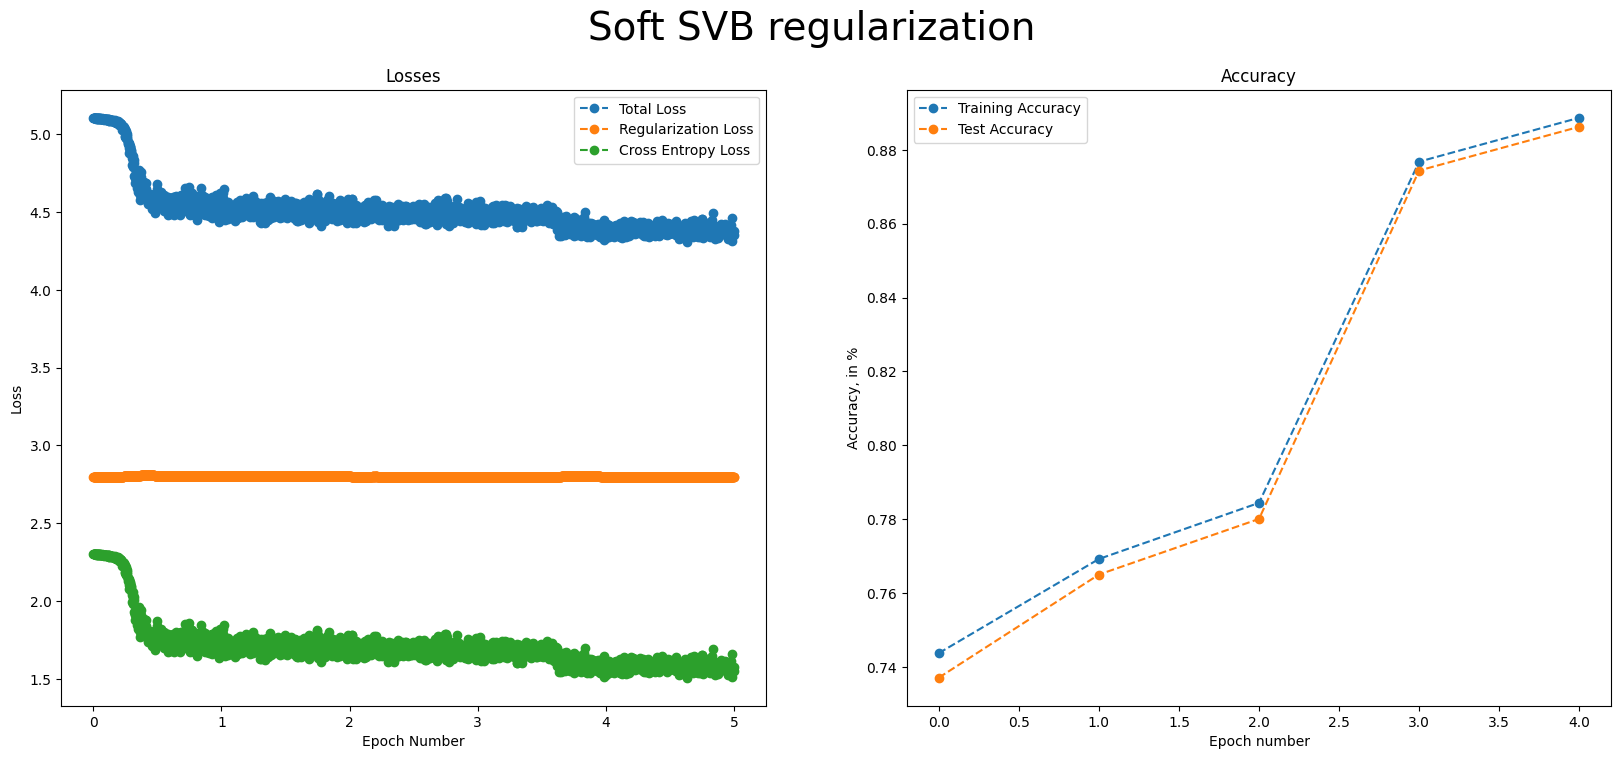

In [14]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Soft SVB regularization",
)

## Hard SVB Regularization

In [15]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, hard_svb=True, hard_svb_lmbd=0.00001
)

Epoch: 0
Accuracy of the network on the test images: 58 %
Epoch: 1
Accuracy of the network on the test images: 75 %
Epoch: 2
Accuracy of the network on the test images: 77 %
Epoch: 3
Accuracy of the network on the test images: 86 %
Epoch: 4
Accuracy of the network on the test images: 97 %


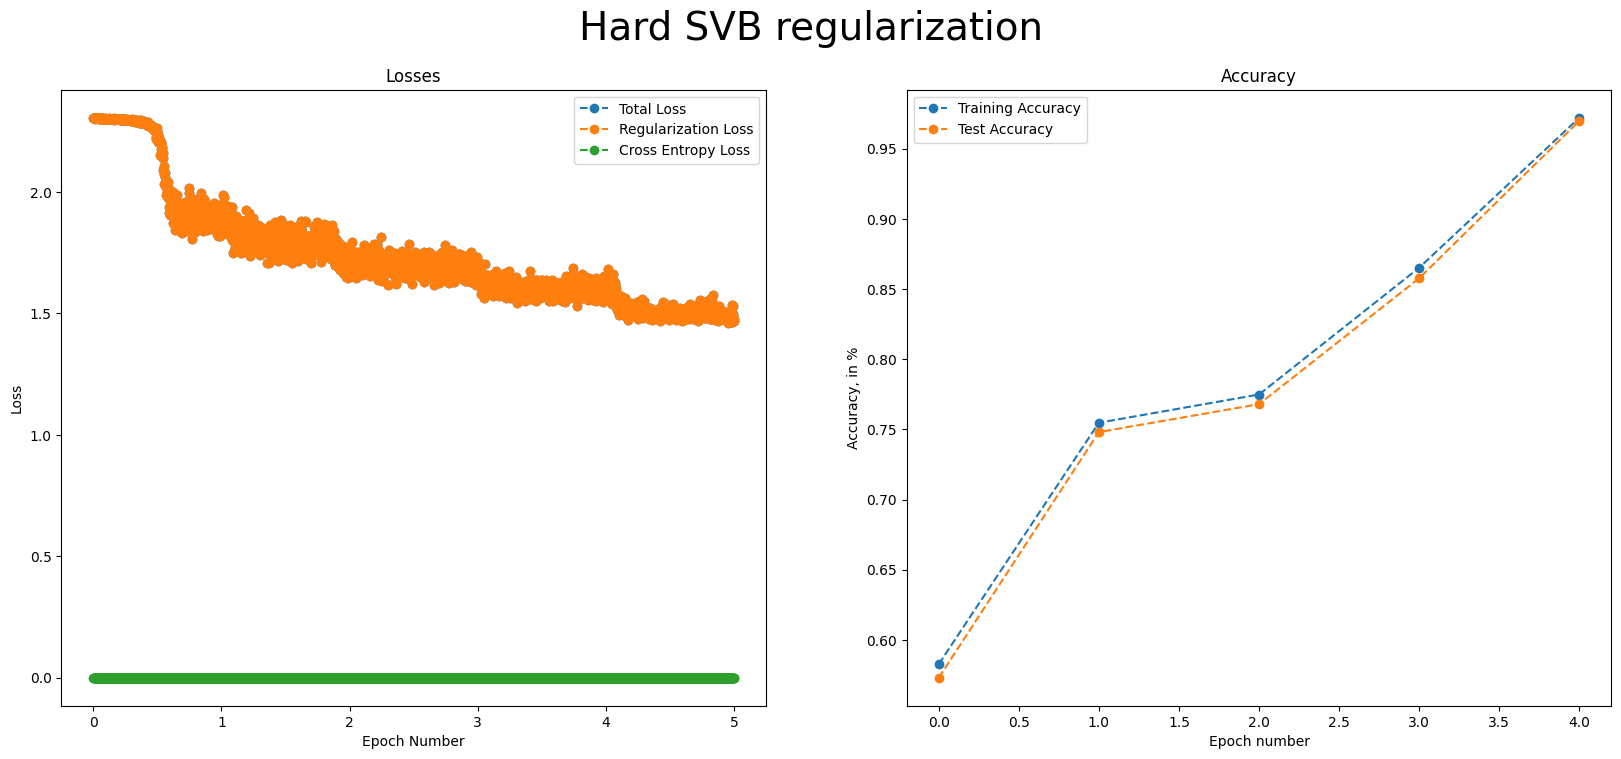

In [16]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Hard SVB regularization",
)

## Jacobi Regularization

In [17]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, jacobi_reg=True, jacobi_reg_lmbd=1
)

calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 0
Accuracy of the network on the test images: 83 %
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 1
Accuracy of the network on the test images: 94 %
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 2
Accuracy of the network on the test images: 96 %


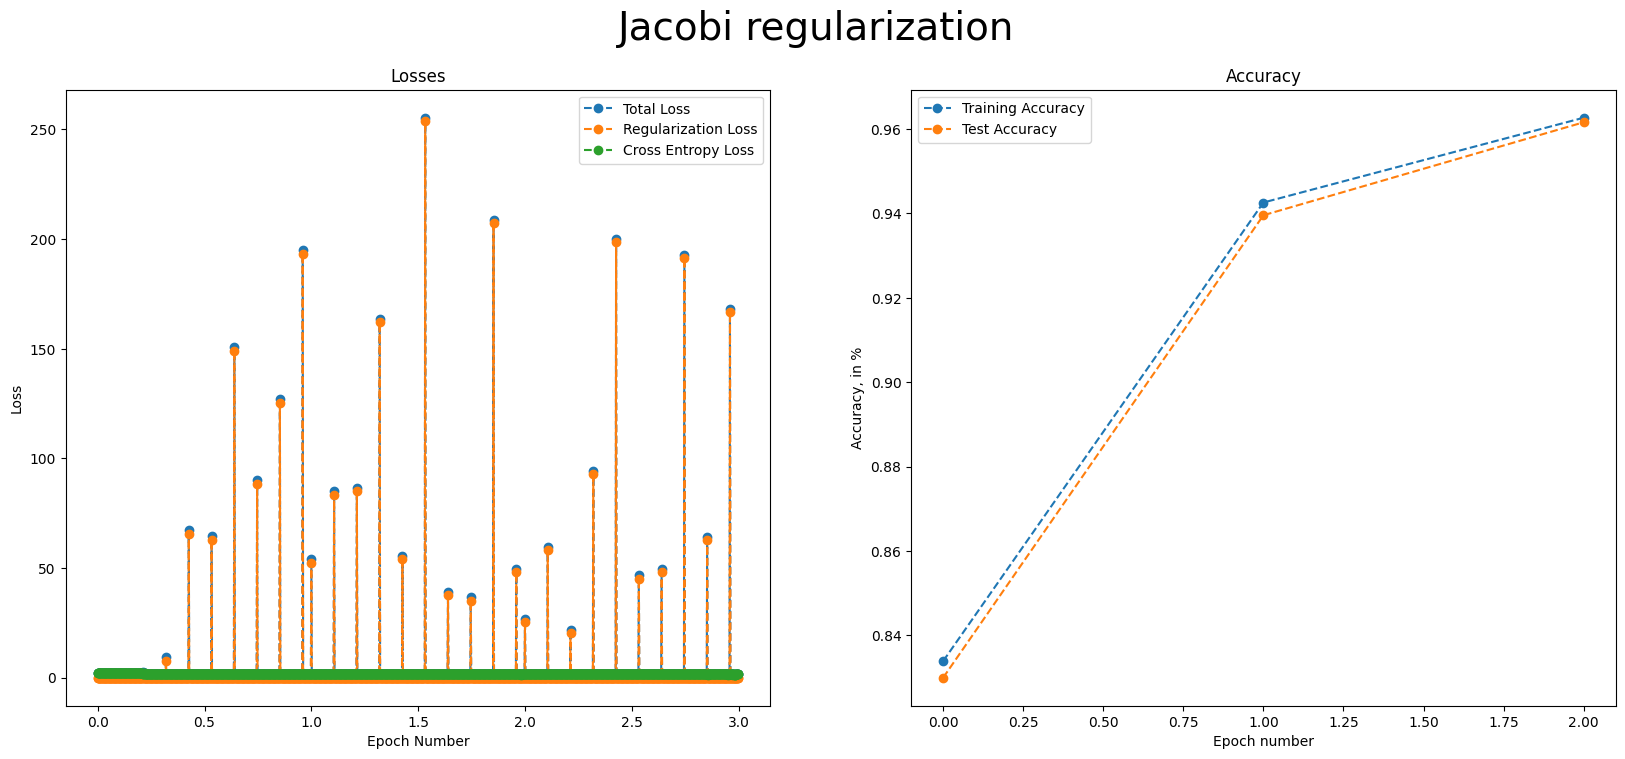

In [18]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Jacobi regularization",
)

## Jacobi Determinant Regularization

In [19]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader,
    test_loader,
    model,
    n_epochs,
    jacobi_det_reg=True,
    jacobi_det_reg_lmbd=0.001,
)

calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 0
Accuracy of the network on the test images: 81 %
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 1
Accuracy of the network on the test images: 94 %
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 2
Accuracy of the network on the test images: 96 %


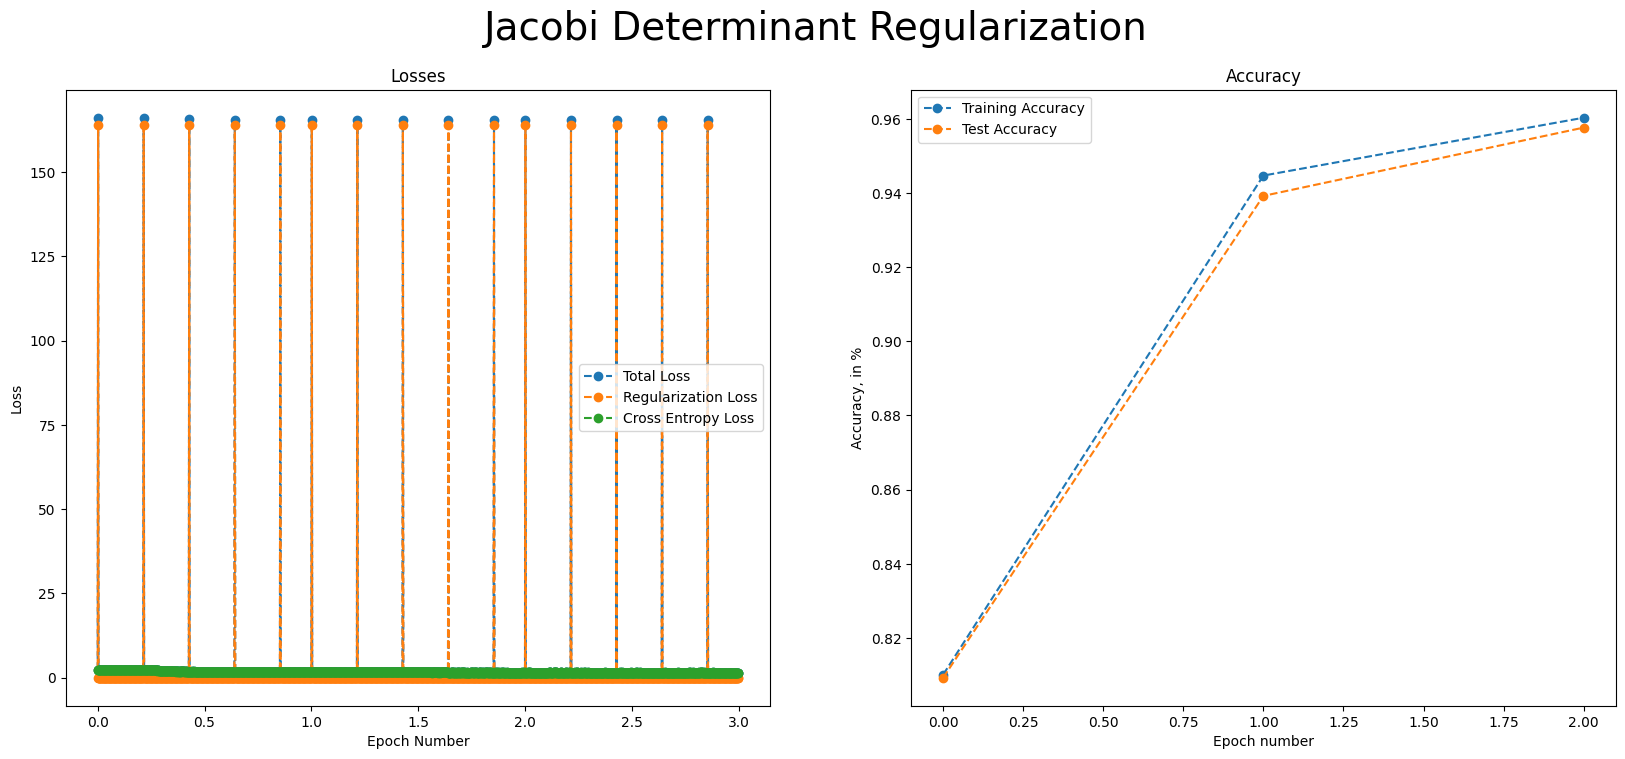

In [20]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Jacobi Determinant Regularization",
)

## Dropout Regularization

In [21]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, dropout_rate=0.2).to(
    device
)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs
)

Epoch: 0
Accuracy of the network on the test images: 87 %
Epoch: 1
Accuracy of the network on the test images: 92 %
Epoch: 2
Accuracy of the network on the test images: 94 %
Epoch: 3
Accuracy of the network on the test images: 95 %
Epoch: 4
Accuracy of the network on the test images: 95 %


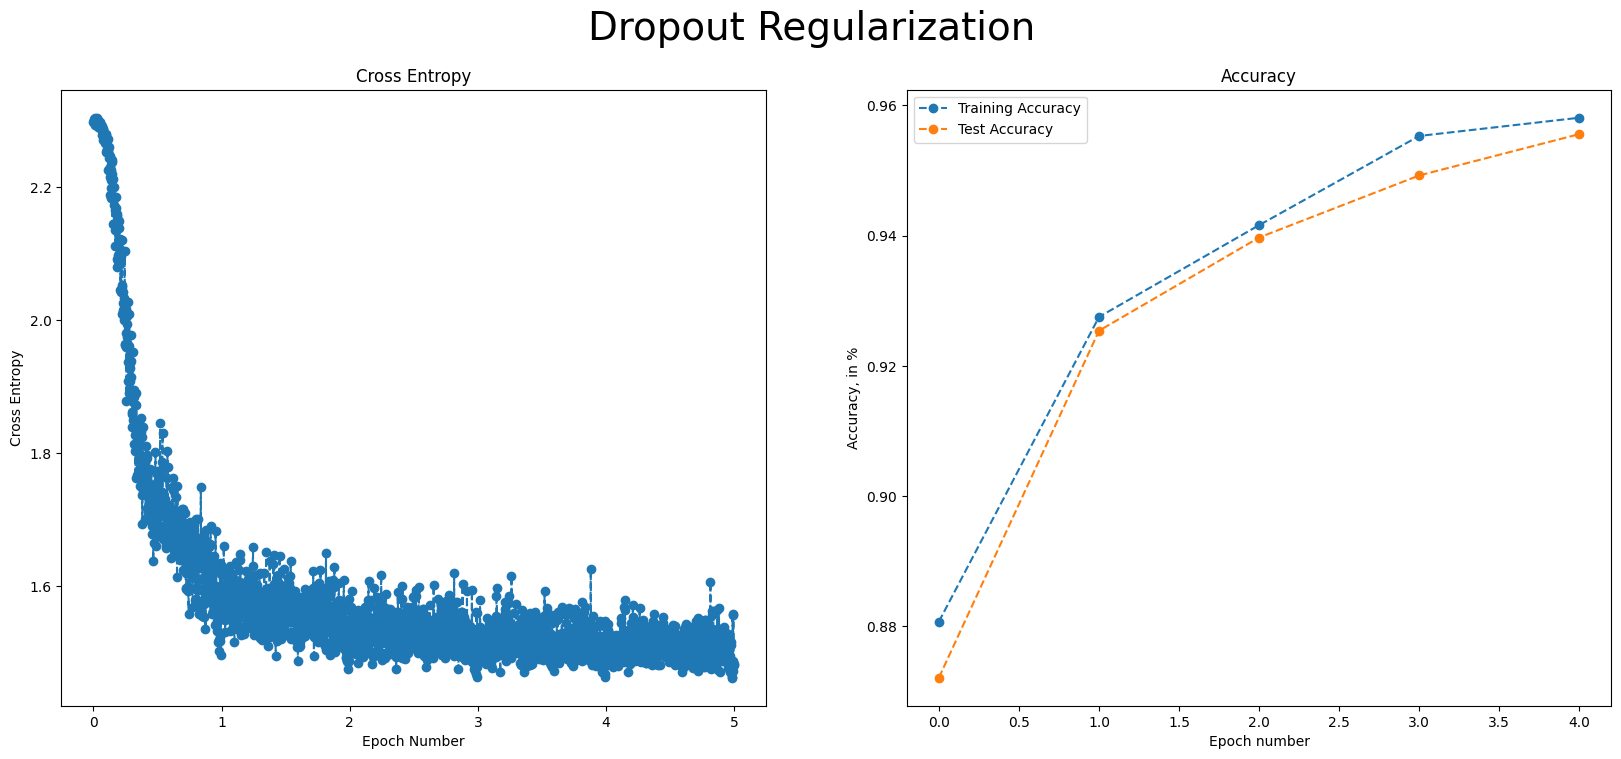

In [22]:
plot_results(
    epochs, losses, train_accuracies, test_accuracies, title="Dropout Regularization"
)

## Confidence Penalty Regularization

In [23]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader,
    test_loader,
    model,
    n_epochs,
    conf_penalty=True,
    conf_penalty_lmbd=0.03,
)

Epoch: 0
Accuracy of the network on the test images: 57 %
Epoch: 1
Accuracy of the network on the test images: 75 %
Epoch: 2
Accuracy of the network on the test images: 78 %


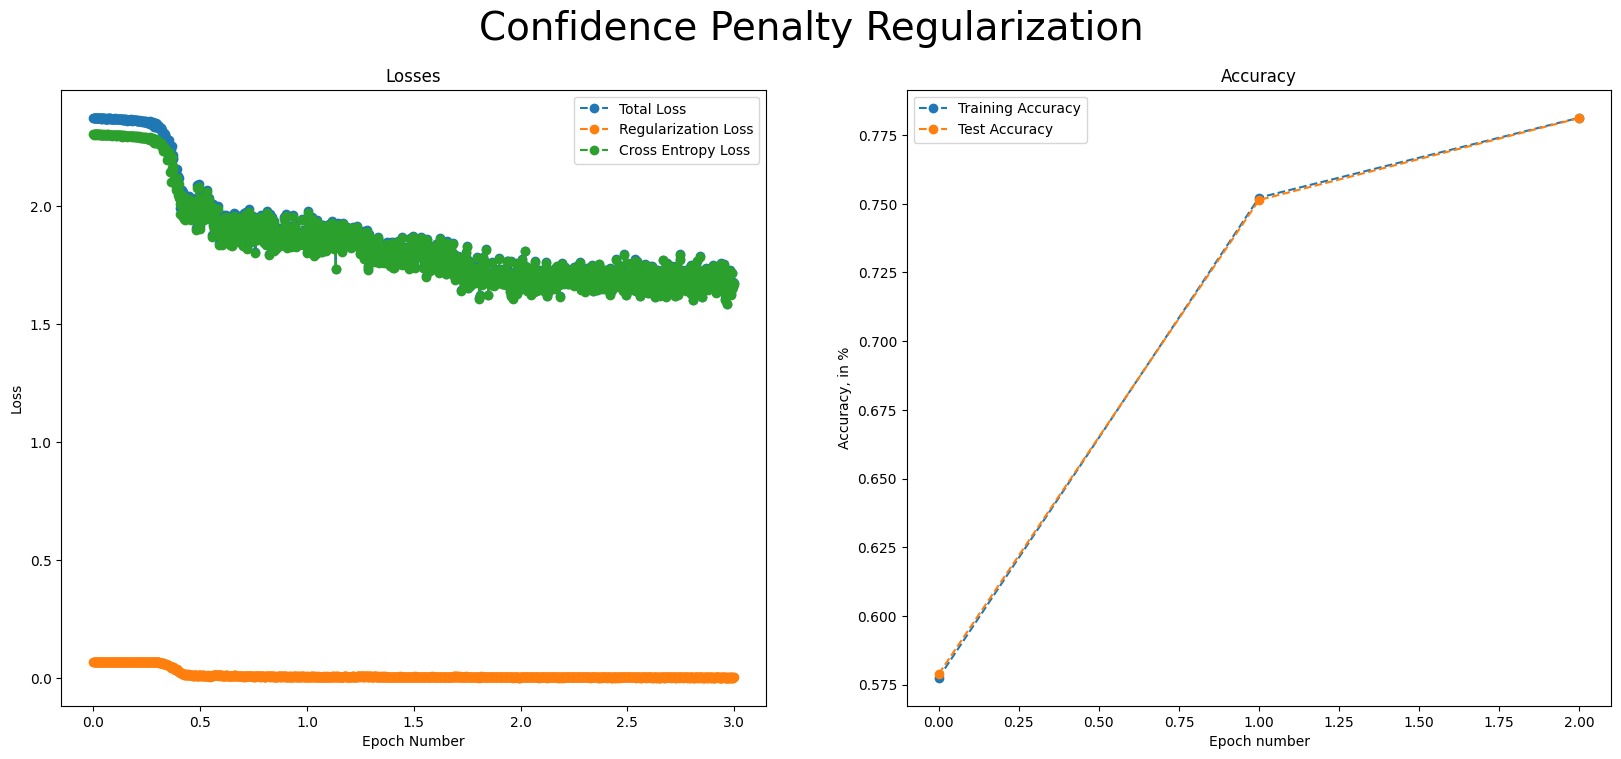

In [24]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Confidence Penalty Regularization",
)

## Label Smoothing Regularization

In [25]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader,
    test_loader,
    model,
    n_epochs,
    label_smoothing=True,
    label_smoothing_lmbd=0.0000001,
)

Epoch: 0
Accuracy of the network on the test images: 11 %
Epoch: 1
Accuracy of the network on the test images: 11 %
Epoch: 2
Accuracy of the network on the test images: 10 %


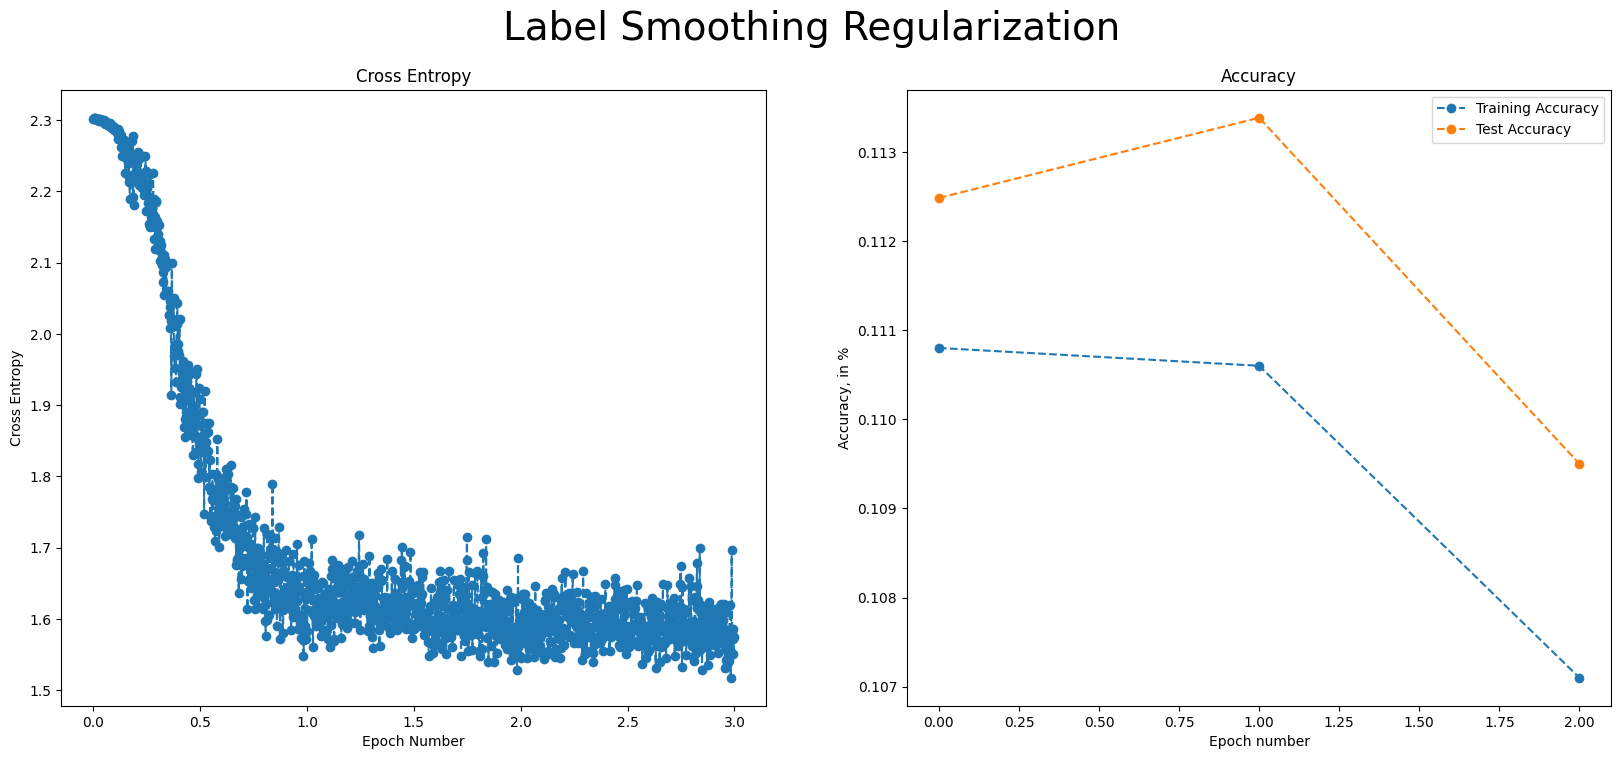

In [26]:
plot_results(
    epochs,
    losses,
    train_accuracies,
    test_accuracies,
    title="Label Smoothing Regularization",
)

## Hessian Regularization (not working)

In [27]:
"""
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, hessian_reg=True, hessian_reg_lmbd=0.001
)
"""

'\nmodel = LeNet(lr=lr, momentum=momentum, in_channels=in_channels).to(device)\nn_epochs = 3\nlosses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(\n    train_loader, test_loader, model, n_epochs, hessian_reg=True, hessian_reg_lmbd=0.001\n)\n'

In [28]:
"""plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies, title="Hessian Regularization"
)"""

'plot_reg_results(\n    epochs,\n    losses,\n    reg_losses,\n    train_accuracies,\n    test_accuracies, title="Hessian Regularization"\n)'

## Noise Injection (to inputs)

In [29]:
model = LeNet(
    lr=lr,
    momentum=momentum,
    in_channels=in_channels,
    noise_inject_input=True,
    noise_stddev=0.05,
).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs
)

Epoch: 0
Accuracy of the network on the test images: 70 %
Epoch: 1
Accuracy of the network on the test images: 77 %
Epoch: 2
Accuracy of the network on the test images: 78 %
Epoch: 3
Accuracy of the network on the test images: 87 %
Epoch: 4
Accuracy of the network on the test images: 96 %


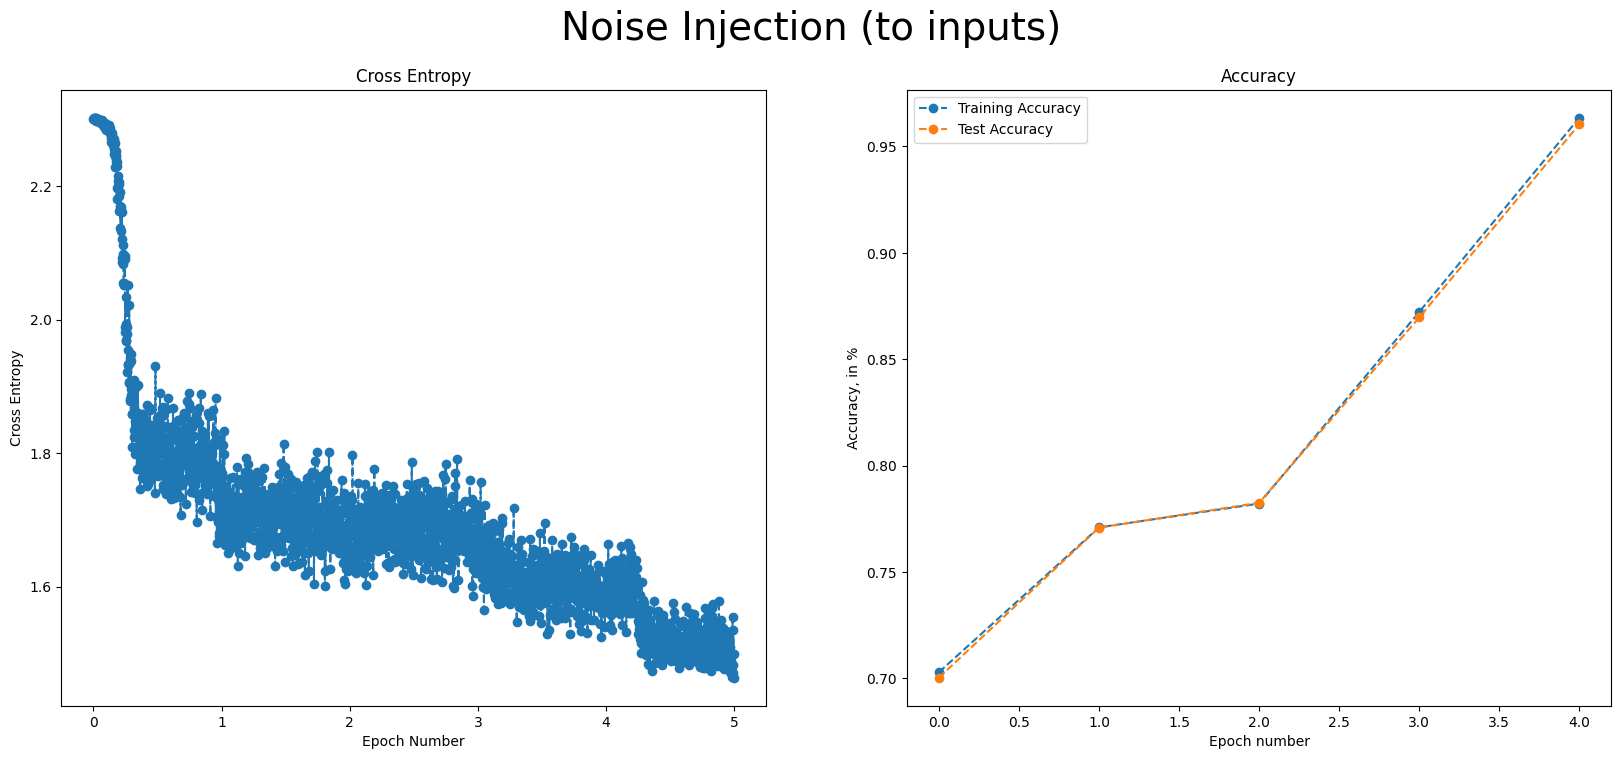

In [30]:
plot_results(
    epochs,
    losses,
    train_accuracies,
    test_accuracies,
    title="Noise Injection (to inputs)",
)

## Noise Injection (to weights of first convolutional layer)

In [31]:
model = LeNet(
    lr=lr,
    momentum=momentum,
    in_channels=in_channels,
    noise_inject_weights=True,
    noise_stddev=0.03,
).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs
)

Epoch: 0
Accuracy of the network on the test images: 82 %
Epoch: 1
Accuracy of the network on the test images: 94 %
Epoch: 2
Accuracy of the network on the test images: 96 %
Epoch: 3
Accuracy of the network on the test images: 96 %
Epoch: 4
Accuracy of the network on the test images: 97 %


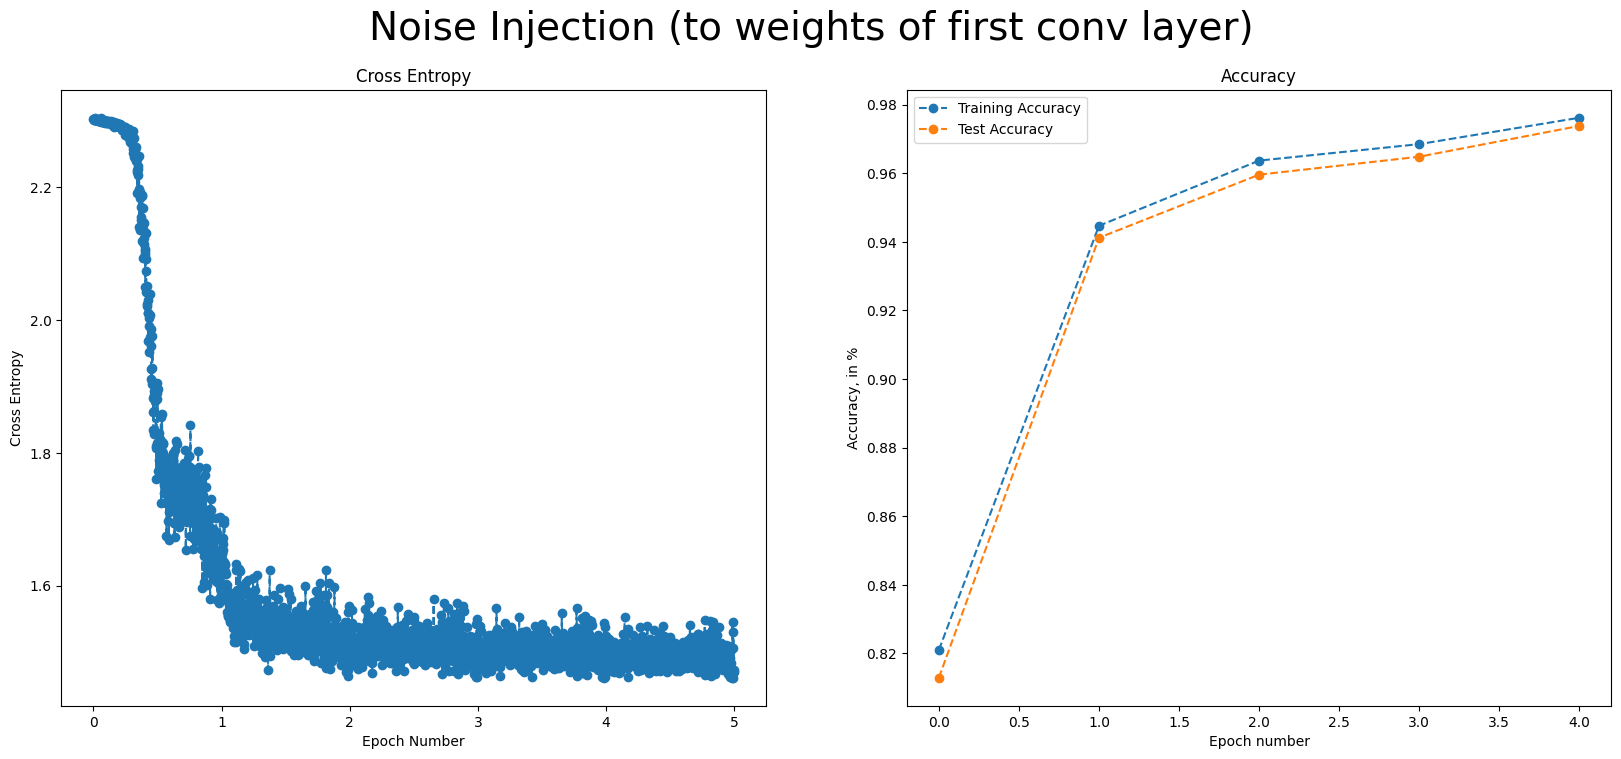

In [32]:
plot_results(
    epochs,
    losses,
    train_accuracies,
    test_accuracies,
    title="Noise Injection (to weights of first conv layer)",
)